In [1]:
import numpy as np
import pandas as pd

In [2]:
titanic_data = pd.read_csv("./Titanic-Dataset.csv")

In [3]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Missing values

In [4]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Missing value handling

1. Drop the data
    - It is the most simple way to deal with missing data
    - However it may lead to potential information loss
    - It is only used when the data is not critical / the number of records with null is very minimal as compared to the total #records.
2. Imputing the missing value: Fill the missing value with an estimate
    - for categorical data we often use `mode imputation`: replacing the missing data with most commonly occurring value
    - for numerical data we can use
        - `mean imputation`: When the distribution is not too skewed
        - `median imputation`: When we have distribution heavy at one tail
        - `estimated imputation`: Which use nearest neighbour or tree based method for imputation
3. Binning and Flag: We will consider the null values seprately.

In [6]:
titanic_df = titanic_data.copy()

In [7]:
titanic_df.shape

(891, 12)

In [9]:
### Dropping the columns

titanic_df = titanic_df.drop(columns=['Cabin'])

titanic_df.shape

(891, 11)

<Axes: ylabel='Frequency'>

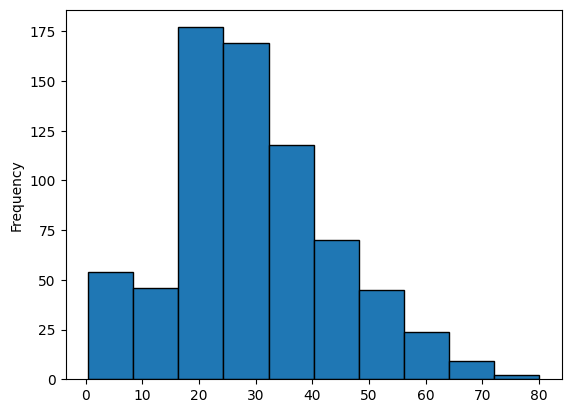

In [11]:
titanic_df['Age'].plot(kind='hist', edgecolor='k')

In [12]:
titanic_df['Age'].mean()

np.float64(29.69911764705882)

In [13]:
titanic_df['Age'].median()

np.float64(28.0)

In [14]:
### mean imputation

titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

In [15]:
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [16]:
titanic_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [17]:
### mode imputation

titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

In [18]:
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64